# How Much of the World Has Access to the Internet?


## 📖 Background
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

## 📖 Executive Summary
This Report includes detailed Data Analysis steps to accomplish the following findings:
* Bahrain, Qatar, Kuwait, United Arab Emirates and Denmark are top 5 countries with the highest internet use (by population share).
  * In 2019, these 5 countries had a total of 23,524,039 users.
****  
* These are the top 5 countries with the highest internet use in each of the following regions:
  * **Middle East & North Africa:** Bahrain, Qatar, Kuwait, United Arab Emirates, Saudi Arabia
  * **Latin America & Caribbean:** Aruba, Bahamas, Chile, Barbados, Costa rica
  * **East Asia & Pacific:** South Korea, Brunei, Japan, Hong Kong, New Zealand
  * **South Asia:** Maldives, Bhutan, Sri Lanka, India, Nepal
  * **North America:** Bermuda, Canada, United States (only 3 countries included in this region)
  * **Europe & Central Asia:** Liechtenstein, Iceland, Luxembourg, Denmark, Norway
* Visualized the internet usage in these regions using line plot.
****
* Top 5 countries with most internet users are:
  * China
  * India
  * United States
  * Brazil
  * Indonesia
****
* Discovered a strong correlation of 0.55 between internet usage and broadband subscriptions
****

In [1]:
# Import pandas
import pandas as pd

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
broadband = pd.read_csv('data/broadband.csv')
internet = pd.read_csv('data/internet.csv')

# Take a look at the first rows
broadband

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804
...,...,...,...,...
3883,Zimbabwe,ZWE,2016,1.217633
3884,Zimbabwe,ZWE,2017,1.315694
3885,Zimbabwe,ZWE,2018,1.406322
3886,Zimbabwe,ZWE,2019,1.395818


In [2]:
# Read the internet table
internet = pd.read_csv('data/internet.csv')

# Take a look at the first rows
internet

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [3]:
# Read the people table
people = pd.read_csv('data/people.csv')
people

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0
...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464
6375,Zimbabwe,ZWE,2017,3599269
6376,Zimbabwe,ZWE,2018,3763048
6377,Zimbabwe,ZWE,2019,3854006


## 1. What are the top 5 countries with the highest internet use (by population share)?
Checking for null values in internet dataframe:

In [2]:
internet.isnull().sum()

Entity               0
Code              1328
Year                 0
Internet_Usage       0
dtype: int64

There are 1328 null values in 'Code' column.
Replacing these null values with '0' and display it.

In [4]:
# Replacing null values with '0' and 'OWID_WRL' in Code Column
internet.Code.fillna('0', inplace=True)
null_code = (internet['Code'] == '0') | (internet['Code'] == 'OWID_WRL')
internet[null_code].Entity.unique().tolist()

['Africa Eastern and Southern',
 'Africa Western and Central',
 'Arab World',
 'Caribbean Small States',
 'Central Europe and the Baltics',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (IDA & IBRD)',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (IDA & IBRD)',
 'Middle East & North Africa (excluding high inc

The null values in 'Code' column represented regions. Lets filter them out and get countries for 2019:

In [5]:
# Filtering out Regions
countries = (internet['Code'] != '0') & (internet['Year'] == 2019)
internet[countries]

# Arranging 'Internet_Usage' column in descending order
high_use = internet[countries].sort_values(by=['Internet_Usage'], ascending=False)
high_use

# Displaying top 5 countries with the highest internet use
high_use.head(5)

,Entity,Code,Year,Internet_Usage
470,Bahrain,BHR,2019,99.701504
5388,Qatar,QAT,2019,99.652804
3416,Kuwait,KWT,2019,99.542676
6716,United Arab Emirates,ARE,2019,99.149998
1552,Denmark,DNK,2019,98.046435


In 2019, the top 5 countries with highest internet use (by population share) are:
* Bahrain
* Qatar
* Kuwait
* United Arab Emirates
* Denmark

## 2. How many people had internet access in those countries in 2019?

Filtering these countries in people dataframe for 2019:

In [6]:
# Making a list for required countries
topcountries = ['BHR', 'QAT', 'KWT', 'ARE', 'DNK']

# Filtering out the required countries
filtered_countries = people[people['Code'].isin(topcountries)]

# Filtering for year 2019
df = (filtered_countries['Year'] == 2019)
filtered_countries[df]

,Entity,Code,Year,Users
477,Bahrain,BHR,2019,1489735
1565,Denmark,DNK,2019,5682653
3091,Kuwait,KWT,2019,4420795
4728,Qatar,QAT,2019,2797495
5986,United Arab Emirates,ARE,2019,9133361


Number of people who had access to internet in these countries in 2019:
* Bahrain: 1489735
* Qatar: 2797495
* Kuwait: 4420795
* United Arab Emirates: 9133361
* Denmark: 5682653

In [7]:
# Total users
print("Total internet users in these countries (2019): " + str(filtered_countries[df].Users.sum()))

Total internet users in these countries (2019): 23524039


## 3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?

Listing down countries with internet use in descending order:

In [8]:
# Filtering out world and regions
countries = (internet['Code'] != '0') | (internet['Code'] == 'OWID_WRL')

# Rearranging by 'Internet_Usage' column in descending order
most_use = internet[countries].sort_values(by=['Internet_Usage'], ascending=False)

#Listing countries with highest internet usage
most_use.Entity.unique().tolist()

['Bahrain',
 'Qatar',
 'Kuwait',
 'Liechtenstein',
 'United Arab Emirates',
 'Iceland',
 'Bermuda',
 'Luxembourg',
 'Denmark',
 'Norway',
 'Andorra',
 'Faeroe Islands',
 'Aruba',
 'Monaco',
 'South Korea',
 'Saudi Arabia',
 'Brunei',
 'Sweden',
 'United Kingdom',
 'Gibraltar',
 'Netherlands',
 'Japan',
 'Switzerland',
 'Canada',
 'Oman',
 'Hong Kong',
 'Finland',
 'New Zealand',
 'Spain',
 'Belgium',
 'Estonia',
 'Kosovo',
 'Singapore',
 'United States',
 'Germany',
 'Austria',
 'Israel',
 'Australia',
 'Macao',
 'Latvia',
 'Cyprus',
 'Malta',
 'Bahamas',
 'Ireland',
 'Poland',
 'Malaysia',
 'France',
 'Chile',
 'Slovenia',
 'Slovakia',
 'Belarus',
 'Russia',
 'New Caledonia',
 'Kazakhstan',
 'Barbados',
 'Lithuania',
 'Costa Rica',
 'Cayman Islands',
 'Czechia',
 'Saint Kitts and Nevis',
 'Guam',
 'Hungary',
 'Azerbaijan',
 'North Macedonia',
 'Croatia',
 'Lebanon',
 'British Virgin Islands',
 'Serbia',
 'Trinidad and Tobago',
 'Uruguay',
 'Moldova',
 'Greece',
 'Portugal',
 'Iraq',
 

By categorizing the countries according to regions, top five countries for highest internet usage in each region are:

**Middle East & North Africa**
* Bahrain
* Qatar
* Kuwait
* United Arab Emirates
* Saudi Arabia
**Latin America & Caribbean** 
* Aruba
* Bahamas
* Chile
* Barbados
* Costa rica
**East Asia & Pacific** 
* South Korea
* Brunei
* Japan
* Hong Kong
* New Zealand
**South Asia** 
* Maldives
* Bhutan
* Sri Lanka
* India
* Nepal
**North America** 
* Bermuda
* Canada
* United States
**Europe & Central Asia** 
* Liechtenstein
* Iceland
* Luxembourg
* Denmark
* Norway

## 4. Create a visualization for those five regions' internet usage over time.

[None, None, None, None, None, None, None, None, None, None, None, None]

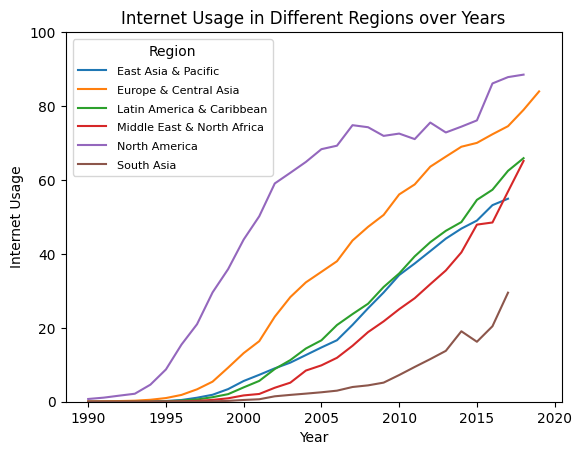

In [9]:
# Making list of required regions
region = ['Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia']

# Filtering these regions
regions = internet[internet['Entity'].isin(region)]

# Renaming 'Entity' column to 'Region'
regions.rename(columns = {'Entity' : 'Region'}, inplace=True)

# Line Plot showing internet usage in different regions over time using seaborn
visual = sns.lineplot(data=regions, x='Year', y='Internet_Usage', hue='Region')
visual.set(ylabel='Internet Usage', title='Internet Usage in Different Regions over Years')
visual.set_ylim(0,100)
plt.setp(visual.get_legend().get_texts(), fontsize='8')

## 5. What are the 5 countries with the most internet users?

To find this out, creating a list of countries with most internet users:

In [10]:
# Replacing null values with '0' in Code Column
people.Code.fillna('0', inplace=True)

# Filtering out Regions and showing data for 2020
users = (people['Code'] != '0') & (people['Code'] != 'OWID_WRL') & (people['Year'] == 2020)
people[users]

# Arranging 'Users' column in descending order
top_users = people[users].sort_values(by=['Users'], ascending=False)

# Listing Countries with highest internet users
top_users.Entity.tolist()

['China',
 'India',
 'United States',
 'Brazil',
 'Indonesia',
 'Russia',
 'Japan',
 'Mexico',
 'Egypt',
 'Germany',
 'Nigeria',
 'Iran',
 'Vietnam',
 'Turkey',
 'United Kingdom',
 'Pakistan',
 'Philippines',
 'Thailand',
 'France',
 'South Korea',
 'Spain',
 'Italy',
 'Bangladesh',
 'South Africa',
 'Argentina',
 'Canada',
 'Colombia',
 'Saudi Arabia',
 'Ukraine',
 'Poland',
 'Morocco',
 'Malaysia',
 'Ethiopia',
 'Algeria',
 'Uzbekistan',
 'Australia',
 'Peru',
 'Myanmar',
 'Ghana',
 'Chile',
 'Kazakhstan',
 'Netherlands',
 'Kenya',
 'Romania',
 'Tanzania',
 'Democratic Republic of Congo',
 'Sudan',
 'Angola',
 'Ecuador',
 'Nepal',
 'Belgium',
 'Cameroon',
 'Sweden',
 'United Arab Emirates',
 'Uganda',
 'Tunisia',
 'Azerbaijan',
 'Guatemala',
 'Czechia',
 'Dominican Republic',
 'Cuba',
 'Hungary',
 'Greece',
 'Belarus',
 'Switzerland',
 'Portugal',
 'Israel',
 'Austria',
 'Sri Lanka',
 'Syria',
 'Afghanistan',
 'Bolivia',
 'Senegal',
 'Hong Kong',
 'Mali',
 'Serbia',
 'Denmark',
 'Sin

5 Countries with most internet users are:
* China
* India
* United States
* Brazil
* Indonesia

## 6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

To find correlation between internet usage and broadband subscriptions for 2019, filtering the datasets for 2019 then merging both.

In [3]:
# Filtering the 'internet' dataset for 2019
df1 = (internet['Year'] == 2019)
internet[df1]

,Entity,Code,Year,Internet_Usage
104,Albania,ALB,2019,69.642855
385,Austria,AUT,2019,87.752205
470,Bahrain,BHR,2019,99.701504
551,Belarus,BLR,2019,82.789152
581,Belgium,BEL,2019,90.370513
...,...,...,...,...
6580,Turkey,TUR,2019,73.976704
6716,United Arab Emirates,ARE,2019,99.149998
6746,United Kingdom,GBR,2019,92.516629
6861,Uruguay,URY,2019,76.949552


In [4]:
# Filtering the 'broadband' dataset for 2019
df2 = (broadband['Year'] == 2019)
broadband[df2]

,Entity,Code,Year,Broadband_Subscriptions
14,Afghanistan,AFG,2019,0.051741
29,Albania,ALB,2019,15.140735
47,Algeria,DZA,2019,8.321684
66,Andorra,AND,2019,47.131264
81,Angola,AGO,2019,0.374130
...,...,...,...,...
3809,Vietnam,VNM,2019,15.345280
3829,World,OWID_WRL,2019,14.892984
3845,Yemen,YEM,2019,1.309927
3866,Zambia,ZMB,2019,0.497681


In [5]:
# Joining 'internet' and 'broadband' dataset for 2019
correlation = internet[df1].join(broadband[df2].set_index(['Entity','Code','Year']), on=['Entity','Code','Year'], how='inner', lsuffix='_x', rsuffix='_y')
correlation

,Entity,Code,Year,Internet_Usage,Broadband_Subscriptions
104,Albania,ALB,2019,69.642855,15.140735
385,Austria,AUT,2019,87.752205,28.128099
470,Bahrain,BHR,2019,99.701504,8.590934
551,Belarus,BLR,2019,82.789152,34.011101
581,Belgium,BEL,2019,90.370513,39.783138
...,...,...,...,...,...
6580,Turkey,TUR,2019,73.976704,17.058664
6716,United Arab Emirates,ARE,2019,99.149998,31.174944
6746,United Kingdom,GBR,2019,92.516629,39.792530
6861,Uruguay,URY,2019,76.949552,29.245749


In [6]:
# Calculating the Pearson's correlation coefficient between internet usage and broadband subscriptions
from scipy import stats
stats.pearsonr(correlation['Internet_Usage'], correlation['Broadband_Subscriptions'])

PearsonRResult(statistic=0.5575180588036525, pvalue=6.486735401004802e-07)

There is a positive correlation of  r value= 0.55 between internet usage and broadband subscriptions.

P value shows the probability of true correlation value being zero. P value is very low, indicating strong correlation between the two.

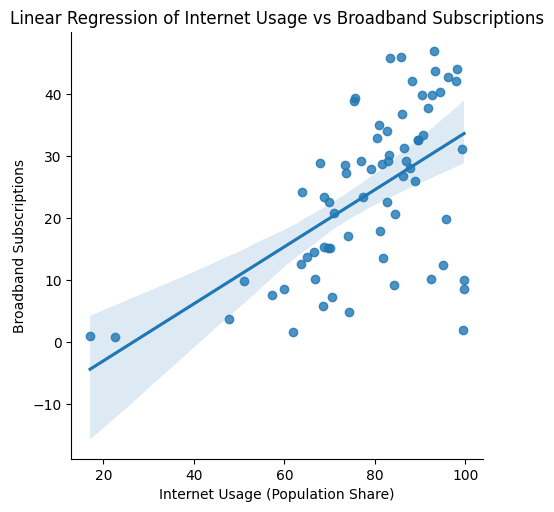

In [7]:
# Plotting Regression line Scatter Plot between internet usage and broadband subscriptions
ax = sns.lmplot(x='Internet_Usage', y='Broadband_Subscriptions', data=correlation)
ax.set(xlabel = 'Internet Usage (Population Share)', ylabel = 'Broadband Subscriptions', title = 'Linear Regression of Internet Usage vs Broadband Subscriptions')